In [12]:
!pwd

/Users/marcus/Dropbox/Project/repo/notebooks


In [14]:
# This notebook should be ran from the root directory of the repository
# Run this cell if your Jupyter Configuration will run it in /notebooks by default
import os
os.chdir("..")


In [15]:
!pwd

/Users/marcus/Dropbox/Project/repo


In [28]:
import datasets
import jax
import jax.numpy as jnp
import jraph
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
print(datasets.dataset_names_lowercase)

['mutag', 'zinc', 'moltox21']


In [126]:
def summary_stats(num_nodes, num_edges, average_degree):
  # Get summary statistics for num_nodes and num_edges
  df = pd.DataFrame({'num_nodes': num_nodes, 'num_edges': num_edges, 'average_degree': average_degree})
  print(df.describe())
  return df

In [141]:
def get_counts(dataset, plot_hist = False):
  num_nodes = []
  num_edges = []
  average_degree = []
  in_degrees = []
  for graph, label in dataset:
    nnode = np.asarray(graph.n_node).item()
    nedge = np.asarray(graph.n_edge).item()
    num_nodes.append(nnode)
    num_edges.append(nedge)
    average_degree.append(nedge / nnode)
    x = []
    for node in range(nnode): 
      print(graph.receivers==node)
      in_degrees.append(int(graph.receivers==node))
      x.append(in_degrees[-1])
    print(x, average_degree[-1])

  if plot_hist:
    plt.hist(num_nodes, bins=100, range=(0, 100))
    plt.title('Number of nodes')
    plt.show()
    plt.hist(num_edges, bins=100, range=(0, 100))
    plt.title('Number of edges')
    plt.show()
    plt.hist(average_degree, bins=20)
    plt.title('Average degree')
    plt.show()
  print(type(num_nodes), type(num_edges), type(average_degree))
  return num_nodes, num_edges, average_degree


In [127]:
def summarise(name):
  benchmark = datasets.load(name)
  print("task dimensions:", benchmark.task_dims())
  num_nodes, num_edges, avg_degree = [], [], []
  for dataset in (benchmark.train, benchmark.val, benchmark.test):
    nnode, nedge, adegree = get_counts(dataset)
    num_nodes += nnode
    num_edges += nedge
    avg_degree += adegree
  return summary_stats(num_nodes, num_edges, avg_degree) 

In [121]:
def inspect_TTV_distributions(name):
  benchmark = datasets.load(name)
  for title,dataset in (("train",benchmark.train), ("val",benchmark.val), ("test",benchmark.test)):
    print("="*10,title,"="*10)
    num_edges, num_nodes, average_in_degree = get_counts(dataset, plot_hist=True)
    summary_stats(num_nodes, num_edges, average_in_degree)

In [142]:
summarise('zinc')

Loading zinc from jraph_data/jraph_zinc.pickle
task dimensions: {'atom': [28], 'bond': [4]}
[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]


TypeError: only size-1 arrays can be converted to Python scalars

Loading zinc from jraph_data/jraph_zinc.pickle
========== train ==========


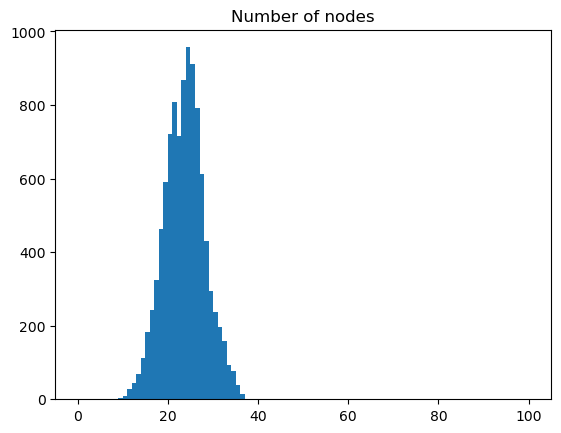

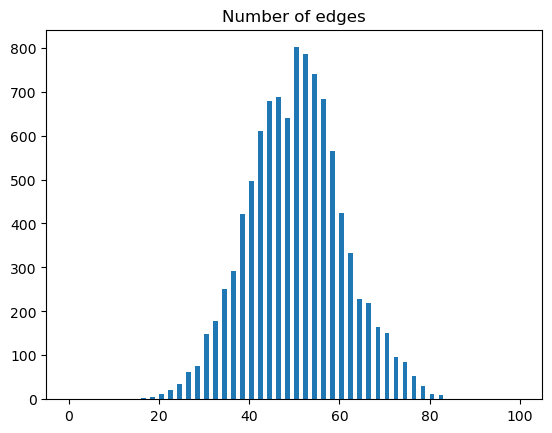

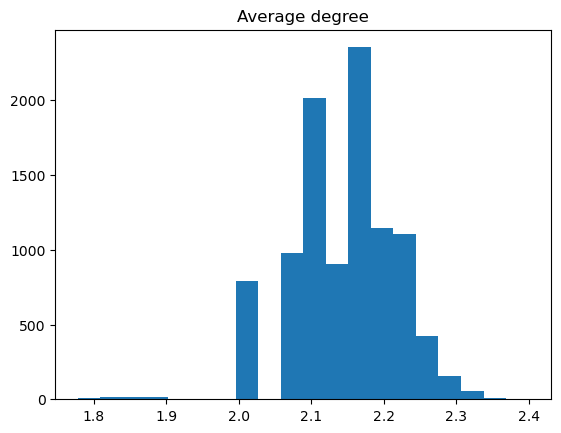

<class 'list'> <class 'list'> <class 'list'>
         num_nodes     num_edges  average_degree
count  10000.00000  10000.000000    10000.000000
mean      49.85580     23.166400        2.144714
std       10.56441      4.489491        0.072320
min       16.00000      9.000000        1.777778
25%       42.00000     20.000000        2.095238
50%       50.00000     23.000000        2.153846
75%       56.00000     26.000000        2.193548
max       82.00000     37.000000        2.400000
========== val ==========


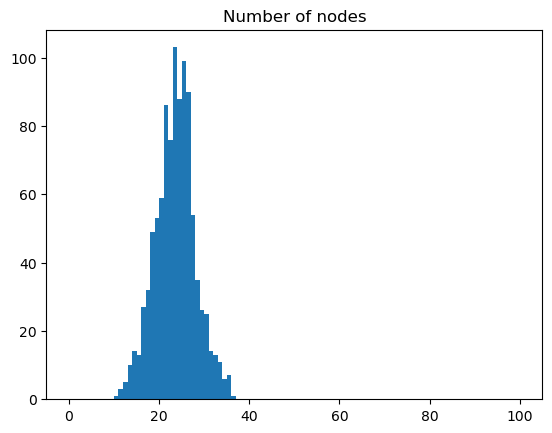

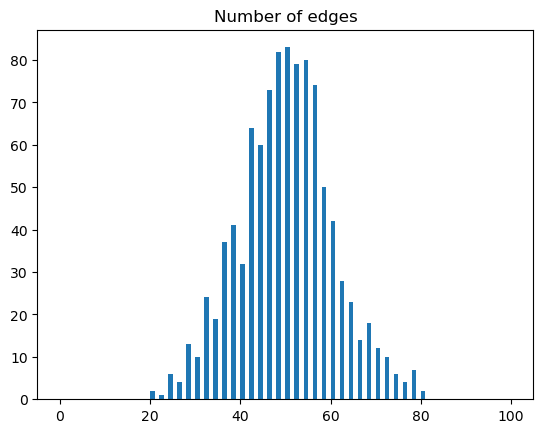

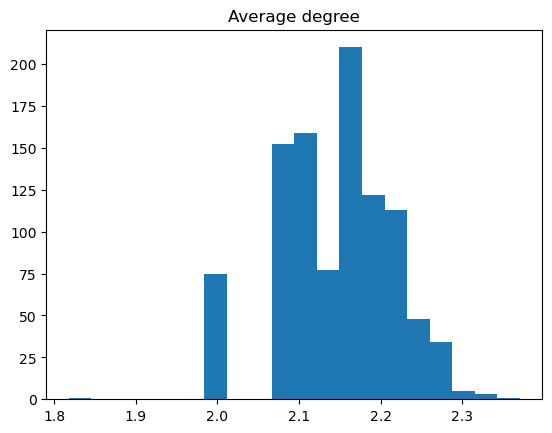

<class 'list'> <class 'list'> <class 'list'>
         num_nodes    num_edges  average_degree
count  1000.000000  1000.000000     1000.000000
mean     49.692000    23.083000        2.146066
std      10.426017     4.453082        0.069224
min      20.000000    10.000000        1.818182
25%      42.000000    20.000000        2.095238
50%      50.000000    23.000000        2.153846
75%      56.000000    26.000000        2.190476
max      80.000000    36.000000        2.370370
========== test ==========


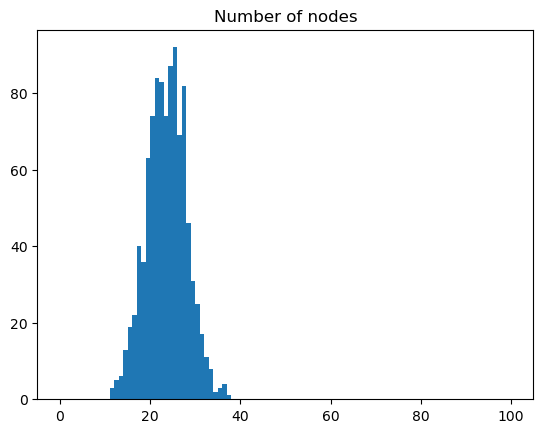

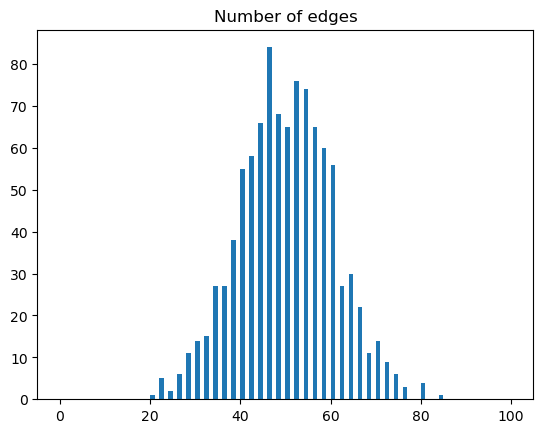

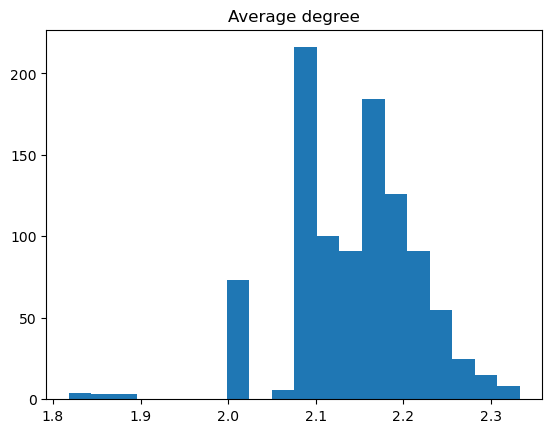

<class 'list'> <class 'list'> <class 'list'>
         num_nodes   num_edges  average_degree
count  1000.000000  1000.00000     1000.000000
mean     49.720000    23.11700        2.143310
std      10.428344     4.43023        0.073637
min      20.000000    11.00000        1.818182
25%      42.000000    20.00000        2.095238
50%      50.000000    23.00000        2.153846
75%      56.000000    26.00000        2.190476
max      84.000000    37.00000        2.333333


In [123]:
inspect_TTV_distributions('zinc')

In [130]:
dfm = summarise('moltox21')

Loading moltox21 from jraph_data/jraph_moltox21.pickle
task dimensions: {'atom': [119, 4, 12, 12, 10, 6, 6, 2, 2], 'bond': [5, 6, 2], 'classes': 12}
<class 'list'> <class 'list'> <class 'list'>
<class 'list'> <class 'list'> <class 'list'>
<class 'list'> <class 'list'> <class 'list'>
         num_nodes    num_edges  average_degree
count  7579.000000  7579.000000     7579.000000
mean     19.055416    39.663280        2.039423
std      11.215450    24.741143        0.155304
min       6.000000     8.000000        0.800000
25%      11.000000    22.000000        2.000000
50%      17.000000    34.000000        2.000000
75%      24.000000    50.000000        2.153846
max     132.000000   290.000000        2.666667


Loading moltox21 from jraph_data/jraph_moltox21.pickle
========== train ==========


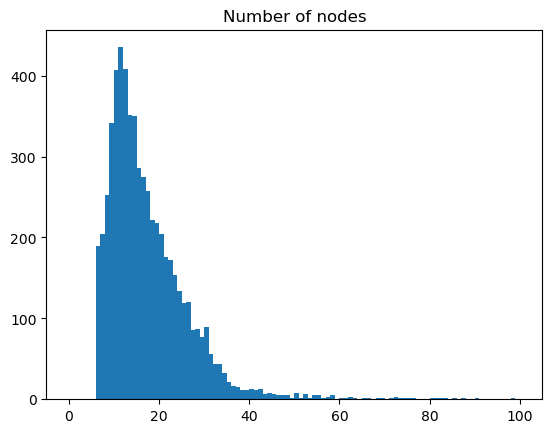

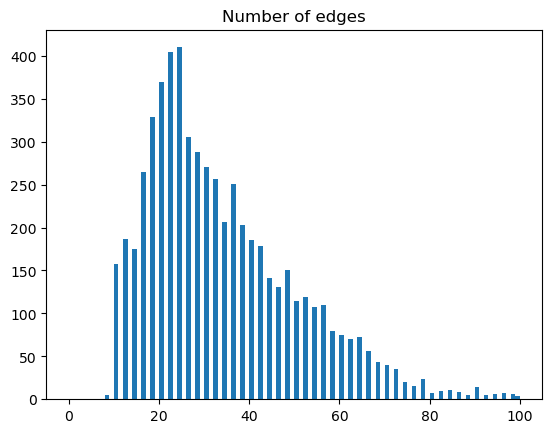

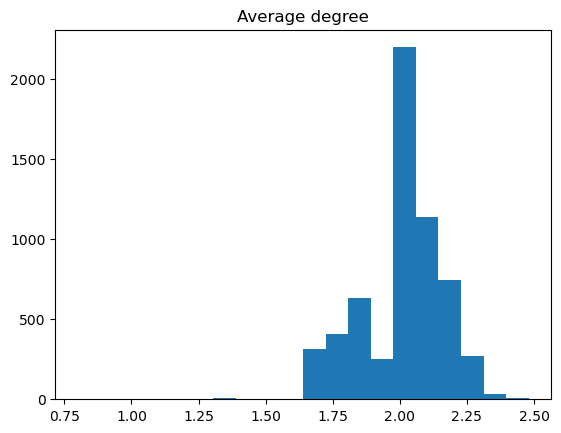

<class 'list'> <class 'list'> <class 'list'>
         num_nodes    num_edges  average_degree
count  6015.000000  6015.000000     6015.000000
mean     34.882793    17.062344        2.004977
std      20.572600     9.390324        0.150984
min       8.000000     6.000000        0.800000
25%      22.000000    11.000000        1.916667
50%      30.000000    15.000000        2.000000
75%      44.000000    21.000000        2.117647
max     246.000000   114.000000        2.480000
========== val ==========


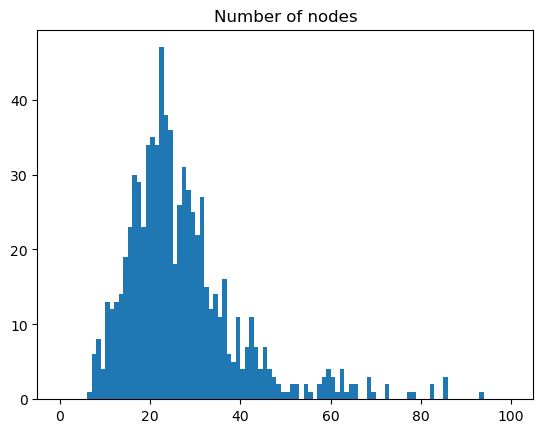

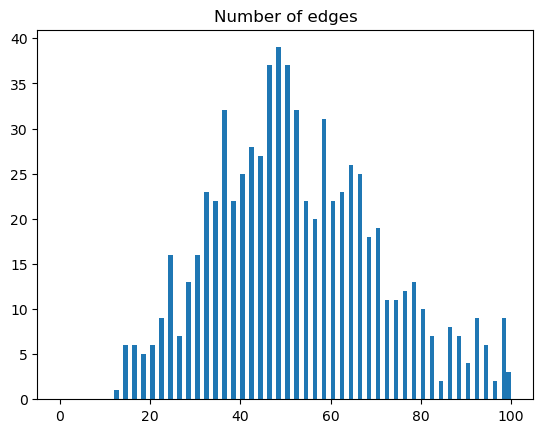

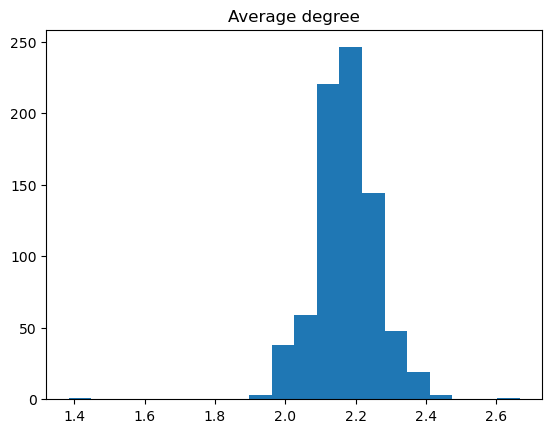

<class 'list'> <class 'list'> <class 'list'>
        num_nodes   num_edges  average_degree
count  782.000000  782.000000      782.000000
mean    58.194373   26.790281        2.172232
std     29.614390   13.715399        0.089620
min     12.000000    6.000000        1.384615
25%     40.000000   19.000000        2.117647
50%     52.000000   24.000000        2.172671
75%     68.000000   31.000000        2.222222
max    290.000000  132.000000        2.666667
========== test ==========


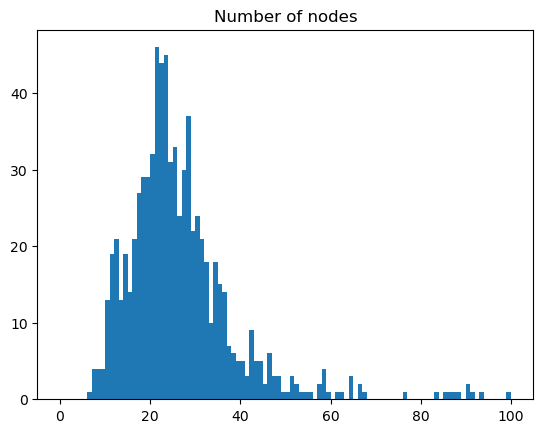

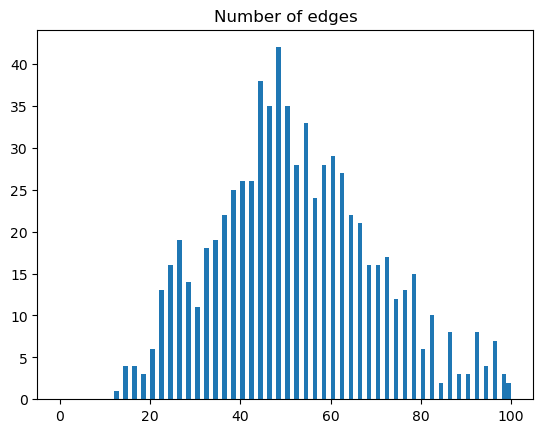

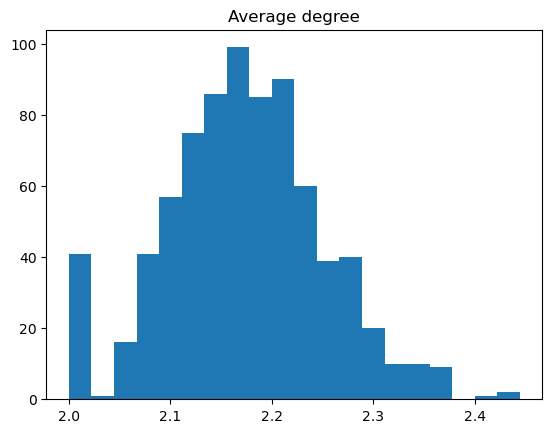

<class 'list'> <class 'list'> <class 'list'>
        num_nodes   num_edges  average_degree
count  782.000000  782.000000      782.000000
mean    57.902813   26.650895        2.171571
std     30.828438   14.321876        0.078564
min     12.000000    6.000000        2.000000
25%     40.000000   19.000000        2.117647
50%     52.000000   24.000000        2.173913
75%     66.000000   30.750000        2.216216
max    268.000000  124.000000        2.444444


In [125]:
inspect_TTV_distributions('moltox21')

# Investigating average-degree < 1

In [133]:
dfm["average_degree"].argmin()

138

In [138]:
print(sorted(dfm["average_degree"])[:10])
idx = dfm["average_degree"].argmin()
print(idx)
datapoint = datasets.load('moltox21').train[idx]
print(datapoint)

[0.8, 1.1428571428571428, 1.1428571428571428, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3846153846153846, 1.4285714285714286]
138
Loading moltox21 from jraph_data/jraph_moltox21.pickle
(GraphsTuple(nodes={'feat': array([[ 7,  0,  2,  5,  2,  0,  2,  0,  0],
       [ 7,  0,  2,  5,  2,  0,  2,  0,  0],
       [ 7,  0,  2,  5,  2,  0,  2,  0,  0],
       [ 7,  0,  2,  5,  2,  0,  2,  0,  0],
       [ 7,  0,  2,  5,  2,  0,  2,  0,  0],
       [ 7,  0,  2,  5,  2,  0,  2,  0,  0],
       [ 7,  0,  1,  5,  0,  0,  1,  0,  0],
       [ 6,  0,  3,  6,  0,  0,  1,  0,  0],
       [ 7,  0,  1,  4,  0,  0,  1,  0,  0],
       [ 7,  0,  1,  4,  0,  0,  1,  0,  0],
       [ 7,  0,  1,  5,  0,  0,  1,  0,  0],
       [ 6,  0,  3,  6,  0,  0,  1,  0,  0],
       [ 7,  0,  1,  4,  0,  0,  1,  0,  0],
       [ 7,  0,  1,  4,  0,  0,  1,  0,  0],
       [11,  0,  0,  7,  0,  0,  5,  0,  0]])}, edges={'feat': array([[1, 0, 1],
       [1, 0, 1]